# Tuesday Afternoon Session

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(25022025)

In [3]:
#Playing BlackJack
#We have a panda series here. The elements are not all the same type
rank = pd.Series(['ace', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'jack', 'queen', 'king'])

In [4]:
#make a suit series list
suit = pd.Series(['hearts', 'spades', 'clubs', 'diamonds'])

In [5]:
# to frame makes this series a 1 column data frame, then we merge both these dfs using cross 
# cross will combine each cell in the combinations possible I assume
# single and double quotes used interchangeably in python, but a block of text with single quotes can use double quotes inside to not interfere -- only an issue if both are in the block of text being used
# deck is now a dataframe with 2 columns

deck = pd.merge(rank.rename('rank').to_frame(), suit.rename('suit').to_frame(), how = 'cross')
deck

,rank,suit
0,ace,hearts
1,ace,spades
2,ace,clubs
3,ace,diamonds
4,2,hearts
5,2,spades
6,2,clubs
7,2,diamonds
8,3,hearts
9,3,spades


In [6]:
# now we can draw some cards from the decks
# first we will make a function that gets us a new deck by wrapping the code we wrote above into a function

# how this is working (defining variables) -- this uses the variable of the name INSIDE the function preferentially to the variable of the same name OUTSIDE the function
# becausse we defined deck in the function it will not pull from the outside
# if your function uses a variable that is not part of your functions, it can cause issues and a lot of bugs

def get_new_deck():
    rank = pd.Series(['ace', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'jack', 'queen', 'king'])
    suit = pd.Series(['hearts', 'spades', 'clubs', 'diamonds'])
    deck = pd.merge(rank.rename('rank').to_frame(), suit.rename('suit').to_frame(), how = 'cross')
    return deck


In [7]:
# now we have a new deck and a new hand -- so we have a random sample (sample) of 2 cards, and replace is false because we do not want repeats
deck = get_new_deck()
hand = deck.sample(2,replace=False)
hand

,rank,suit
47,queen,diamonds
45,queen,spades


In [8]:
# removing the hand that was just drawn
# we put hand.index because this tells to drop by rows (columns are ID'd by column name, rows by index -- drop defaults to dropping rows)
deck.drop(hand.index)
#deck.drop(hand.index,axis='rows') #this shows how you can specify axis for dropping rows

,rank,suit
0,ace,hearts
1,ace,spades
2,ace,clubs
3,ace,diamonds
4,2,hearts
5,2,spades
6,2,clubs
7,2,diamonds
8,3,hearts
9,3,spades


In [9]:
# we can manually remove the cards from the deck when they're drawn
def draw_cards(n,deck):
    drawn = deck.sample(n,replace=False)
    deck = deck.drop(drawn.index)

    return drawn, deck

In [10]:
# we can define multiple variables at once, in particular as a tuple

tup_a = (1,2,3)
a, b, c, = tup_a
print(a,b,c)


1 2 3


In [11]:
# let's see how the function above works
# we'll do a loop
# draw cards where n is the hand size
# len is length -- so we will get remaining cards in deck until deck is less than 5 cards

hand_size = 5
deck = get_new_deck()
while len(deck) > hand_size:
    hand, deck = draw_cards(hand_size,deck)
    print(len(deck))


47
42
37
32
27
22
17
12
7
2


In [12]:
# use rank and suit
deck.set_index(['rank','suit'])

,
rank,suit
ace,clubs
3,hearts


In [13]:
# 2 rows, and 0 columns in this
deck.set_index(['rank','suit']).shape

(2, 0)

In [14]:
# now let's set the scoring up
# we need to write a function to get the score of the hand

#cards are scored more/less independently except the Ace -- we'll separate those out
# we're starting with 0 and adding the score of the cards consecutively

# do aces last because aces are the only source of uncertainty -- so we want them last so that they take into account the total score before the uncertainty
# an equivelant 

def score_hand(hand):
    score = 0
    aces = hand.loc[hand['rank']=='ace'] #locate the aces
    rest = hand.loc[hand['rank'] != 'ace'] #locate everything but the aces

    for _i, card in rest.iterrows(): #iterrows provides for loop 1 row at a time -- it returns the index and the row itself. We don't want the index, so we have _i to ignore the index and only use the row
        if type(card['rank']) == int: #int is a class, just like str is. This is referring to data, not just a name (no parantheses)
            score += card['rank'] # the += adds what's on the right hand size to the score
        elif type(card['rank']) == str:
            score += 10
    
    for _i, card in aces.iterrows(): #ace can be 1 or 11, want it to be as high as possible without going over 21
        if score +11 > 21:
            score += 1
        else:
            score += 11
    
    return score

In [15]:
#last version of the while loop as output
hand['rank']

30      8
35      9
3     ace
23      6
10      3
Name: rank, dtype: object

In [16]:
score_hand(hand)

27

In [17]:
# how to manage loops and extra commands to manage them
# this is an infinite loop, since while continues for the duration of something next to it being True
# be careful about using while loops
score = 0
while True:
    score += 3
    if score > 50:
        break #takes the loop your in and ends it there
    # will not be executed on the last loop
    # foo(bar)

In [18]:
# how to get out of the loop manually if the condition is set
score

51

In [19]:
# this would run indefinitely
# while True:
    # if True:
        #pass
    # if False:
        #pass

In [20]:
deck = get_new_deck()
for i, card in deck.iterrows():
    break

In [21]:
i # i is 0, the index of a card

0

In [22]:
card

rank       ace
suit    hearts
Name: 0, dtype: object

In [23]:
i, card

(0,
 rank       ace
 suit    hearts
 Name: 0, dtype: object)

In [24]:
# how to keep loop going
# if we draw an ace let's forget the hand
# the score will not be incremented if there is an ace in the hand

deck = get_new_deck()
running_score = 0
while len(deck) > hand_size:
    hand, deck = draw_cards(hand_size, deck)
    if 'ace' in hand['rank']:
        continue #this means skip this but keep the loop going, so proceed with everything after
    running_score += score_hand(hand) # this says draw hand, score hand, and add to running score

In [25]:
import matplotlib.pyplot as plt

In [ ]:
#play around with this to change conditions as needed
def play_hand(deck):
    hand, deck = draw_cards(2, deck) #start by drawing 2 cards from the deck

    condition = False
    if score_hand(hand) < 14:
        condition = True

    while condition:
        drawn_card, deck = draw_cards(1,deck)
        hand = pd.concat([hand,drawn_card])

        if score_hand(hand) > 15:
            condition = False
            
    score = score_hand(hand)
    if score > 21:
        score = 0
    return score


(array([ 6.,  0.,  0.,  0.,  0.,  0.,  4.,  8., 14., 18.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

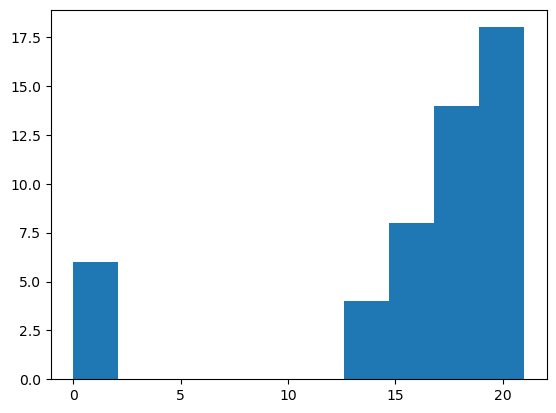

In [68]:
# Next rule of blackjack: can decide to draw another card or not after first 2 cards
# Set up a scaffold to simulate this process
# How to develop and implement a strategy for this 

num_trials = 50

trial_results = []

for i in range(num_trials):
    deck = get_new_deck()
    score = play_hand(deck)
    trial_results.append(score)

plt.hist(trial_results)